In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sentiment_df = pd.read_csv('spacy_results.csv')
final = pd.read_csv('final.csv')
agg_final = pd.read_csv('agg_final.csv')

In [3]:
final_unique = final.drop_duplicates(subset='show_title')
sentiment_final = pd.merge(sentiment_df, final_unique[['show_title', 'genre', 'type']], on='show_title', how='left')
sentiment_final.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
sentiment_final.head()

,article_title,body,rating,rating_sent,show_title,article_score,article_label,article_subjectivity,title_score,title_label,title_subjectivity,fixed_sent,genre,type
0,'Melissa Etheridge: My Window' review — a cele...,"Read our review of ', 'My Window', "", Grammy A...",3,Good,My Window,0.19,Positive,0.48,0.0,Negative,0.00,Positive,NaN,NaN
1,'Alex Edelman: Just For Us' review — solo show...,"Read our five-star review of ', 'Just For Us',...",5,Excellent,Just For Us,0.11,Positive,0.40,0.5,Positive,0.50,Positive,comedy,other
2,'Back to the Future' review — 1.21 gigawatts o...,"Read our four-star review of ', 'Back to the F...",4,Very Good,Back to the Future,0.08,Positive,0.38,0.1,Positive,0.11,Positive,NaN,NaN
3,'The Cottage' review — an over-the-top comedy ...,"Read our four-star review of ', 'The Cottage',...",4,Very Good,The Cottage,0.13,Positive,0.53,-0.5,Negative,1.00,Positive,comedy,play
4,'Purlie Victorious' review — hilarious satire ...,"Read our five-star review of ', 'Purlie Victor...",5,Excellent,Purlie Victorious: A Non-Confederate Romp Thro...,0.09,Positive,0.40,0.5,Positive,1.00,Positive,NaN,NaN


### spaCy Results

In the previous notebook I took a look at the distributions of sentiment scores and subjectivity scores for both articles and titles. For the sentiment scores, the majority of articles and titles were concentrated within a certain range, visualized below. While not a perfect normal distribution, it follows a similar bell-shape.

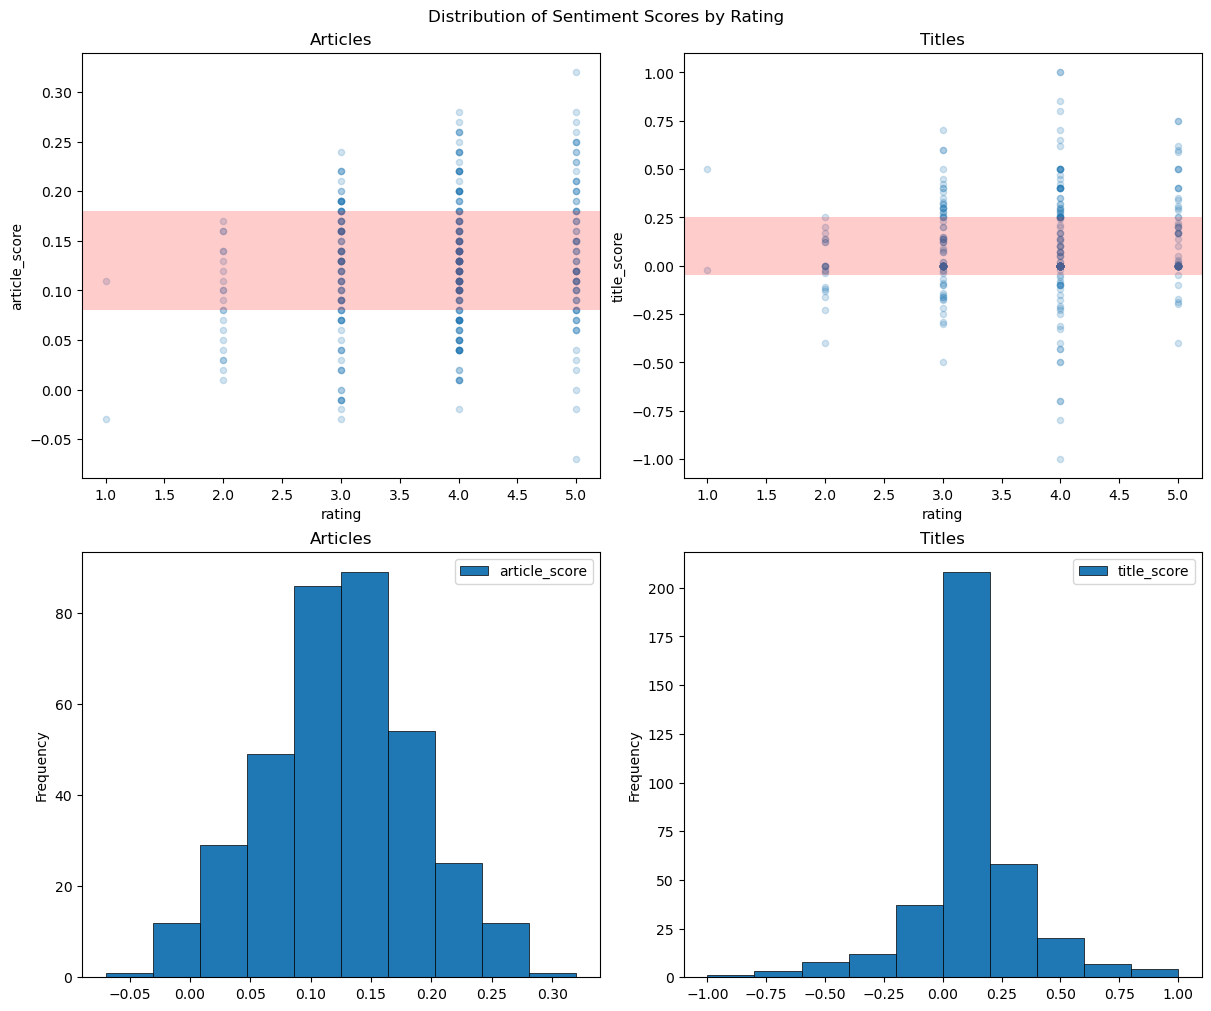

In [5]:
fig, axs = plt.subplots(2,2, figsize=(12,10), layout='constrained')
fig.suptitle('Distribution of Sentiment Scores by Rating')
sentiment_df.plot(x='rating', y='article_score', kind='scatter', alpha=0.2, title='Articles', ax=axs[0,0])
y1 = 0.18
y2 = 0.08
axs[0,0].axhspan(y1, y2, color='red', alpha=0.2, lw=0)

sentiment_df.plot(x='rating', y='title_score', kind='scatter', alpha=0.2, title='Titles', ax=axs[0,1])
y3 = 0.25
y4 = -0.05
axs[0,1].axhspan(y3, y4, color='red', alpha=0.2, lw=0)

sentiment_df.plot(x='rating', y='article_score', kind='hist', title='Articles', edgecolor='black', linewidth=0.5, ax=axs[1,0])
sentiment_df.plot(x='rating', y='title_score', kind='hist', title='Titles', edgecolor='black', linewidth=0.5, ax=axs[1,1])
plt.show()

I repeated this process with the subjectivity, and while the articles followed a similar trend of most of the scores falling within a certain range, the titles did something completely different, as we can see below.

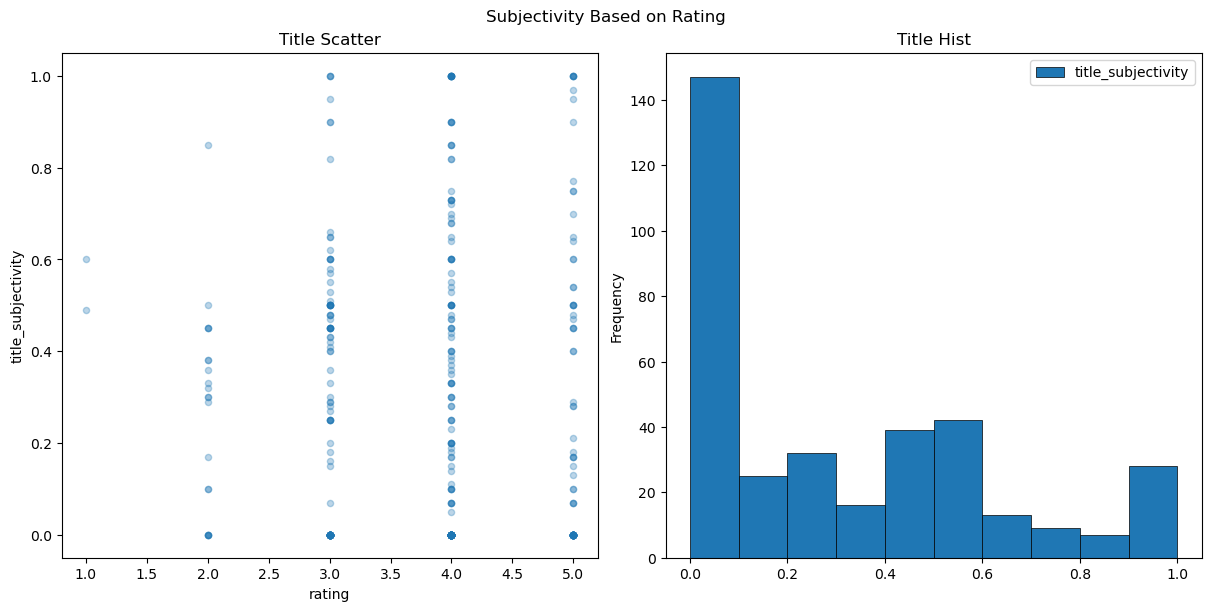

In [6]:
fig, axs = plt.subplots(1,2, figsize=(12,6), layout='constrained')
fig.suptitle('Subjectivity Based on Rating')
sentiment_df.plot(x='rating', y='title_subjectivity', kind='scatter', title='Title Scatter', alpha=0.3, ax=axs[0])
sentiment_df.plot(x='rating', y='title_subjectivity', kind='hist', edgecolor='black', linewidth=0.5, title='Title Hist', ax=axs[1])
plt.show()

The range of subjectivity in titles isn't surprising once you think about the fact that titles are meant to try and grab the reader's attention and make them want to click on the article, but what I find interesting is the wide range in 4 star reviews and the relatively modest scores of 1 star reviews. 

In the previous notebook I made a heatmap to quickly check the correlations between article score and the financial aspects of each show, and unfortunately found that my highest correlation scores were around 0.3, which is a correlation so weak it's nearly nonexistant. I visualized this below using the aggregated dataframe so that duplicate data doesn't add too much noise:

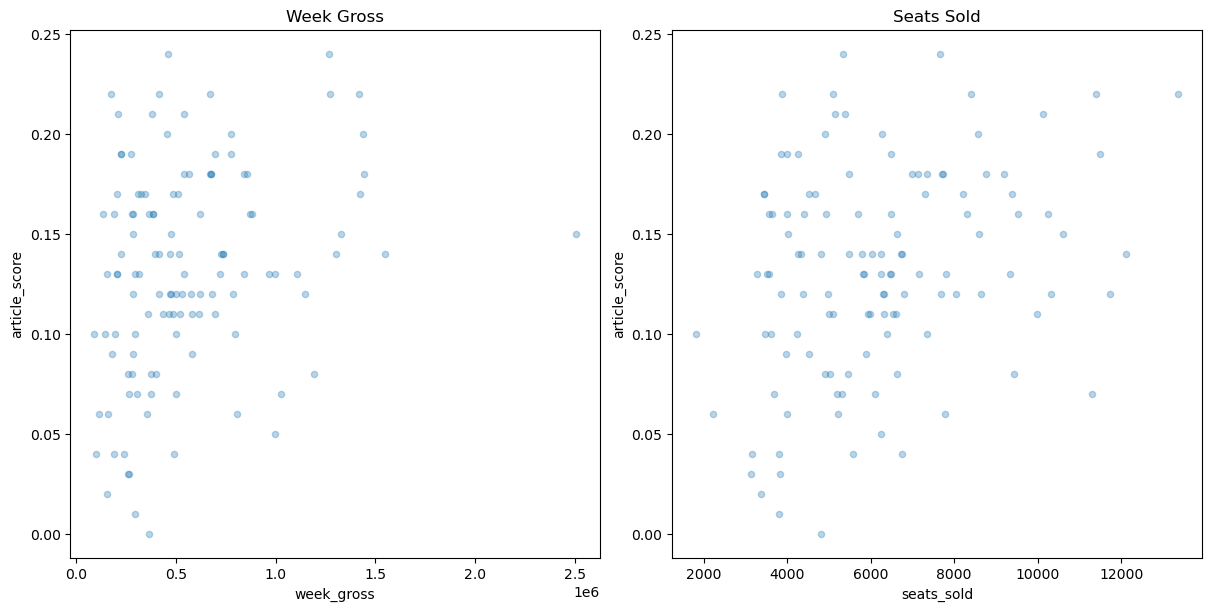

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), layout='constrained')

agg_final.plot(x='week_gross', y='article_score', kind='scatter', alpha=0.3, title='Week Gross', ax=axs[0])
agg_final.plot(x='seats_sold', y='article_score', kind='scatter', alpha=0.3, title='Seats Sold', ax=axs[1])
plt.show()

Unsurprisingly, there is very weak correlation visualized here and it feels safe to say that overall, the kind of reviews a show will get has very little effect on how well a show will do.

In [8]:
final['genre'].value_counts()

genre
drama           3568
classic         3403
comedy          1723
other_genre      656
fam_friendly     546
jukebox          436
dark_comedy      378
contemporary     338
historical       150
romance          106
tragedy           88
satire            47
revue             16
thriller          14
biography          5
Name: count, dtype: int64

In [9]:
final['type'].value_counts()

type
musical    9438
play       1853
other       183
Name: count, dtype: int64

While the spread between all of the genres and types is far from even, I still think we can still get an idea of the kinds of shows that people respond positively to.

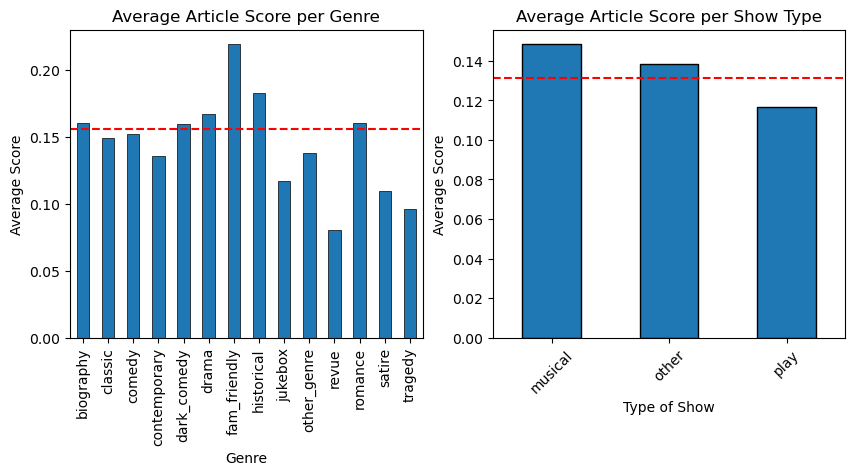

In [10]:
avg_article_rating = final[final['genre'] != 'thriller'].groupby('genre')['article_score'].mean(numeric_only=True)
genre_mean = final['article_score'].mean()
avg_art_subj = agg_final.groupby('type')['article_score'].mean(numeric_only=True)
type_mean = agg_final['article_score'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10,4))
avg_article_rating.plot.bar(width=0.5, edgecolor='black', linewidth=0.5, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

avg_art_subj.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Score per Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Score')

axs[1].set_title('Average Article Score per Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Average Score')
axs[1].tick_params(axis='x', rotation=45)


plt.show()

Note: thriller is a genre that will be included in other plots, but is excluded here because its average article score is 0, which detracts from the rest of the plot

I find these two graphs interesting to look at side by side because shows that fall under the family friendly genre rank the highest, and yet the type of show that has the highest average score is primarily comprised of shows in the 'other_genre' genre and 'comedy'.

When we look at the average article score for these two genres, both actually fall under the overall mean for article scores across genres, which is surprising. 

We could be seeing this because of the amounts of data I have, and this may not be indicative of actual trends. Musicals scored the lowest in average article score, but that show type also had the largest amount of data to average out. 

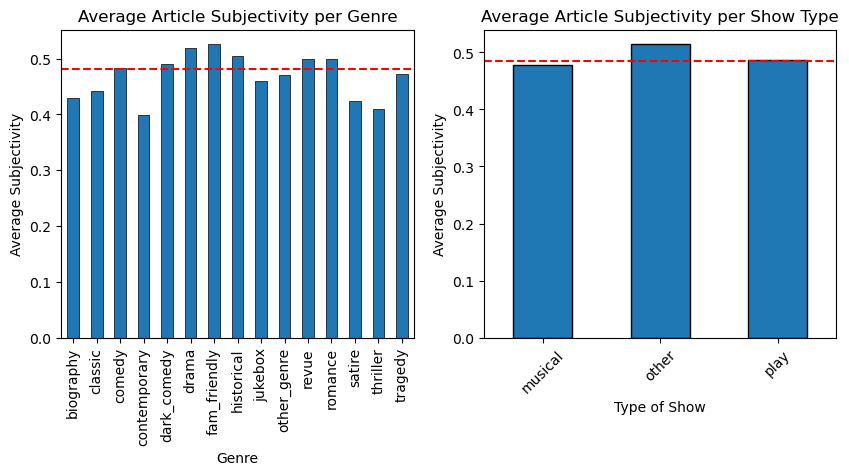

In [11]:
avg_article_rating = final.groupby('genre')['article_subjectivity'].mean(numeric_only=True)
genre_mean = final['article_subjectivity'].mean()
avg_art_subj = agg_final.groupby('type')['article_subjectivity'].mean(numeric_only=True)
type_mean = agg_final['article_subjectivity'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10,4))
avg_article_rating.plot.bar(width=0.5, edgecolor='black', linewidth=0.5, ax=axs[0])
axs[0].axhline(genre_mean, color='red', linestyle='--')

avg_art_subj.plot.bar(width=0.5, edgecolor='black', linewidth=1, ax=axs[1])
axs[1].axhline(type_mean, color='red', linestyle='--')

axs[0].set_title('Average Article Subjectivity per Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Average Subjectivity')

axs[1].set_title('Average Article Subjectivity per Show Type')
axs[1].set_xlabel('Type of Show')
axs[1].set_ylabel('Average Subjectivity')
axs[1].tick_params(axis='x', rotation=45)


plt.show()

To round things off I checked how the article subjectivity was between genres and show types. I'm surprised that revue scored over the overall average - though that just goes to show that the critics that write those articles are very negatively opinionated. It's interesting to see that satire and thriller scored relatively low in subjectivity, as I feel like those genres lend themselves very well for opinionated pieces. 

I'm not surprised that shows in the 'Other' category have articles with higher subjectivity as that's where stand-up comedy, other solo shows, and magic shows went. Those kinds of more intimate shows where you can really connect - or really dislike - with the performer would get more opinionated reviews.